# Example of application to real data

add script to scrap data with yahoo finance

In [23]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [24]:
dataset = ["vetropak","vontonbel","sig","vaudoise","bcv"]
name = "vetropak"
path = "./data/data_vontonbel.xlsx"
folder_results = './results/'+name
if os.path.exists(folder_results) == False:
    os.makedirs(folder_results)

trade = pd.read_excel(path,sheet_name="trade_price")
print(trade.shape)
trade.head(5)

(2909, 3)


,Trade Close,Trade Count,Timestamp
0,79.90,120,2021-12-30 19:00:00
1,80.00,93,2021-12-30 18:30:00
2,80.00,4,2021-12-30 18:00:00
3,80.05,6,2021-12-30 17:30:00
4,80.15,16,2021-12-30 17:00:00


In [25]:
bid = pd.read_excel(path,sheet_name="bid")
print(bid.shape)
bid.head(5)

(3033, 2)


,Bid Close,Timestamp
0,79.80,2021-12-30 19:00:00
1,79.85,2021-12-30 18:30:00
2,80.00,2021-12-30 18:00:00
3,80.00,2021-12-30 17:30:00
4,80.20,2021-12-30 17:00:00


In [26]:
ask = pd.read_excel(path,sheet_name="ask")
print(ask.shape)
ask.head(5)

(3041, 2)


,Ask Close,Timestamp
0,80.3,2021-12-30 19:00:00
1,80.2,2021-12-30 18:30:00
2,80.1,2021-12-30 18:00:00
3,80.2,2021-12-30 17:30:00
4,80.4,2021-12-30 17:00:00


In [27]:
bid_ask_merge = pd.merge(bid,ask,on=["Timestamp"])
print(bid_ask_merge.shape)

(2977, 3)


In [28]:
bid_ask_merge

,Bid Close,Timestamp,Ask Close
0,79.80,2021-12-30 19:00:00,80.3
1,79.85,2021-12-30 18:30:00,80.2
2,80.00,2021-12-30 18:00:00,80.1
3,80.00,2021-12-30 17:30:00,80.2
4,80.20,2021-12-30 17:00:00,80.4
...,...,...,...
2972,25.38,2021-06-08 16:00:00,57.1
2973,72.05,2021-06-08 15:30:00,72.2
2974,72.05,2021-06-08 15:30:00,56.7
2975,25.20,2021-06-08 15:30:00,72.2


In [29]:
bid_ask_merge["midpoint"]= (bid_ask_merge["Bid Close"]+bid_ask_merge["Ask Close"])/2
bid_ask_merge

,Bid Close,Timestamp,Ask Close,midpoint
0,79.80,2021-12-30 19:00:00,80.3,80.050
1,79.85,2021-12-30 18:30:00,80.2,80.025
2,80.00,2021-12-30 18:00:00,80.1,80.050
3,80.00,2021-12-30 17:30:00,80.2,80.100
4,80.20,2021-12-30 17:00:00,80.4,80.300
...,...,...,...,...
2972,25.38,2021-06-08 16:00:00,57.1,41.240
2973,72.05,2021-06-08 15:30:00,72.2,72.125
2974,72.05,2021-06-08 15:30:00,56.7,64.375
2975,25.20,2021-06-08 15:30:00,72.2,48.700


In [30]:
final_merged = pd.merge(bid_ask_merge,trade,on=["Timestamp"])
final_merged["bid-ask spread"] = final_merged["Ask Close"] - final_merged["Bid Close"]
final_merged

,Bid Close,Timestamp,Ask Close,midpoint,Trade Close,Trade Count,bid-ask spread
0,79.80,2021-12-30 19:00:00,80.3,80.050,79.90,120,0.50
1,79.85,2021-12-30 18:30:00,80.2,80.025,80.00,93,0.35
2,80.00,2021-12-30 18:00:00,80.1,80.050,80.00,4,0.10
3,80.00,2021-12-30 17:30:00,80.2,80.100,80.05,6,0.20
4,80.20,2021-12-30 17:00:00,80.4,80.300,80.15,16,0.20
...,...,...,...,...,...,...,...
2756,25.38,2021-06-08 16:00:00,57.1,41.240,71.95,32,31.72
2757,72.05,2021-06-08 15:30:00,72.2,72.125,72.15,10,0.15
2758,72.05,2021-06-08 15:30:00,56.7,64.375,72.15,10,-15.35
2759,25.20,2021-06-08 15:30:00,72.2,48.700,72.15,10,47.00


In [31]:
final_merged['direction_trade'] = np.where(final_merged['Trade Close']>= final_merged['midpoint'], "buy", "sell")
final_merged.head()

,Bid Close,Timestamp,Ask Close,midpoint,Trade Close,Trade Count,bid-ask spread,direction_trade
0,79.80,2021-12-30 19:00:00,80.3,80.050,79.90,120,0.50,sell
1,79.85,2021-12-30 18:30:00,80.2,80.025,80.00,93,0.35,sell
2,80.00,2021-12-30 18:00:00,80.1,80.050,80.00,4,0.10,sell
3,80.00,2021-12-30 17:30:00,80.2,80.100,80.05,6,0.20,sell
4,80.20,2021-12-30 17:00:00,80.4,80.300,80.15,16,0.20,sell


In [32]:
data_final = final_merged[["Timestamp","Trade Close","Trade Count","direction_trade","midpoint"]]

data_final

,Timestamp,Trade Close,Trade Count,direction_trade,midpoint
0,2021-12-30 19:00:00,79.90,120,sell,80.050
1,2021-12-30 18:30:00,80.00,93,sell,80.025
2,2021-12-30 18:00:00,80.00,4,sell,80.050
3,2021-12-30 17:30:00,80.05,6,sell,80.100
4,2021-12-30 17:00:00,80.15,16,sell,80.300
...,...,...,...,...,...
2756,2021-06-08 16:00:00,71.95,32,buy,41.240
2757,2021-06-08 15:30:00,72.15,10,buy,72.125
2758,2021-06-08 15:30:00,72.15,10,buy,64.375
2759,2021-06-08 15:30:00,72.15,10,buy,48.700


In [33]:
test = data_final.copy()
test.head(5)

,Timestamp,Trade Close,Trade Count,direction_trade,midpoint
0,2021-12-30 19:00:00,79.90,120,sell,80.050
1,2021-12-30 18:30:00,80.00,93,sell,80.025
2,2021-12-30 18:00:00,80.00,4,sell,80.050
3,2021-12-30 17:30:00,80.05,6,sell,80.100
4,2021-12-30 17:00:00,80.15,16,sell,80.300


In [34]:
test = data_final.copy()
test["Timestamp"] = pd.to_datetime(test["Timestamp"]) # only if it isn't already
test = test.set_index("Timestamp")
agre_data = test.groupby("direction_trade").resample('D').sum()
agre_data

Trade Close  Trade Count  midpoint
direction_trade Timestamp                                     
buy             2021-06-08      1654.20         2292  1282.160
                2021-06-09      4122.50         1068  3311.110
                2021-06-10      1558.05          710  1481.825
                2021-06-11       999.85          464   997.450
                2021-06-12         0.00            0     0.000
...                                 ...          ...       ...
sell            2021-12-26         0.00            0     0.000
                2021-12-27       320.50          154   320.875
                2021-12-28       484.05           57   484.475
                2021-12-29       803.25          133   803.600
                2021-12-30       961.00          334   967.075

[412 rows x 3 columns]

In [35]:
buy = agre_data["Trade Count"].loc["buy"].T
sell = agre_data["Trade Count"].loc["sell"].T

In [36]:

columns = ["#buys","#sells"]
buy_and_sell = pd.merge(buy,sell,on=["Timestamp"])
buy_and_sell.columns = columns
buy_and_sell = buy_and_sell.loc[(buy_and_sell!=0).any(axis=1)]
print(buy_and_sell.shape)
buy_and_sell

(147, 2)


,#buys,#sells
Timestamp,,
2021-06-08,2292,472
2021-06-09,1068,323
2021-06-10,710,794
2021-06-11,464,451
2021-06-14,188,720
...,...,...
2021-12-23,269,244
2021-12-27,317,154
2021-12-28,445,57


<AxesSubplot:xlabel='Timestamp'>

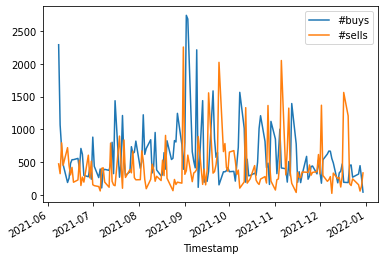

In [37]:
buy_and_sell.plot()

In [38]:
buy_and_sell.describe()

,#buys,#sells
count,147.000000,147.000000
mean,579.244898,418.605442
std,445.426817,383.706929
min,41.000000,22.000000
25%,318.500000,203.500000
50%,448.000000,305.000000
75%,687.500000,468.500000
max,2741.000000,2257.000000


In [39]:
from model.deepsurrogate import DeepSurrogate
from tqdm import tqdm
deepsurrogate = DeepSurrogate()

columns_pin = ["buy","sell"]
buy_and_sell.columns = columns_pin
#buy_and_sell = buy_and_sell.head(50)

PIN_values = []
for i in tqdm(range(buy_and_sell.shape[0])):
    pin = deepsurrogate.get_pin(buy_and_sell.iloc[i].values)
    #print(pin)
    PIN_values.append(pin)

buy_and_sell['PIN'] = PIN_values
buy_and_sell.to_csv("test_results.csv")
buy_and_sell[["buy","sell"]].plot()

par.model.save_dir


 84%|████████▎ | 123/147 [12:46<01:57,  4.91s/it]

In [ ]:
close_price = final_merged[['Timestamp','midpoint','bid-ask spread']]
close_price.index = close_price['Timestamp']
close_price = close_price.iloc[:,1:]
close_price = close_price.resample('D').mean()
close_price = close_price.dropna()
graph_merge = pd.merge(close_price,buy_and_sell,left_index=True,right_index=True)
graph_merge["buy-sell difference"] = np.abs(graph_merge['buy'] - graph_merge["sell"])

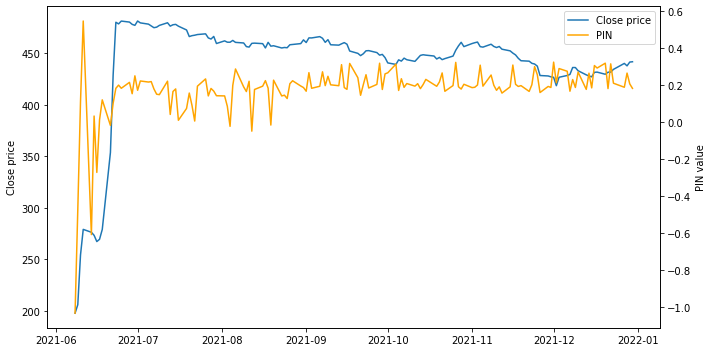

<Figure size 432x288 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
l1, = ax.plot(graph_merge.index,graph_merge.midpoint)
ax.set_ylabel(r"Close price")
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value")

plt.legend([l1, l2],["Close price", "PIN"])
plt.xlabel(r"Date")
plt.tight_layout()
plt.grid(False)
plt.show()
plt.savefig(folder_results+"/close_price_pin.png")

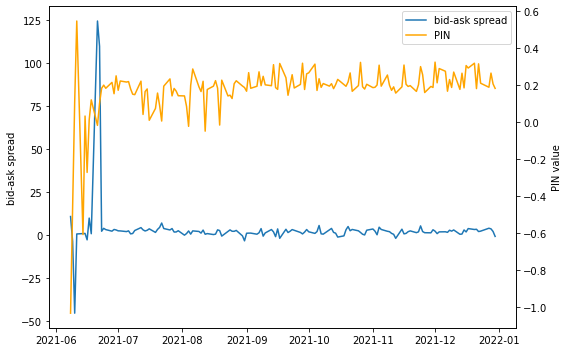

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
l1, = ax.plot(graph_merge.index,graph_merge["bid-ask spread"])
ax.set_ylabel(r"bid-ask spread")
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value")

plt.legend([l1, l2],["bid-ask spread", "PIN"])
plt.xlabel(r"Date")
plt.grid(False)
plt.tight_layout()
plt.savefig(folder_results+"/bid_ask_spread_pin.png")
plt.show()


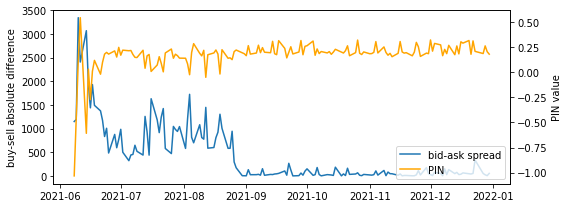

In [ ]:
fig,ax = plt.subplots(figsize=(8,3))
l1, = ax.plot(graph_merge.index,graph_merge["buy-sell difference"])
ax.set_ylabel(r"buy-sell absolute difference")
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value")

plt.legend([l1, l2],["bid-ask spread", "PIN"])
plt.xlabel(r"Date")
plt.tight_layout()
plt.grid(False)
plt.show()
#plt.savefig(folder_results+"/bid_ask_spread_pin.png")

In [ ]:
# from pin_model_simulation import fit

# # create another strcture
# for i in tqdm(range(buy_and_sell.shape[0])):
#     value = buy_and_sell.iloc[i]
#     #print(value["buy"][:])
#     res = fit(pd.Series(value["buy"]), pd.Series(value["sell"]),1)
#     PIN = (res['a']*res['mu'])/((res['a']*res['mu'])+res['eb']+res['es'])
#     #print(PIN)
# print(resultat)